In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


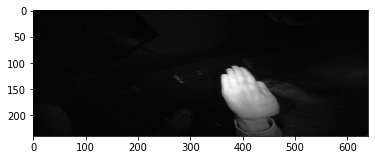

In [2]:
img = cv2.imread('leapGestRecog/00/01_palm/frame_00_01_0001.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
path = 'leapGestRecog'

In [4]:
x=os.listdir(path)
x.remove('.DS_Store')

In [5]:
X = list()
y = list()

In [6]:
for p in x:
    for i in os.listdir(os.path.join(path,p)):
        for j in os.listdir(os.path.join(path,p,i)):
            img_array = cv2.imread(os.path.join(path,p,i,j) ,cv2.IMREAD_GRAYSCALE) 
            new_array = cv2.resize(img_array, (32, 32)) 
            X.append(new_array)
            if i[0]=='0':
                cat=i[1]
            else:
                cat=i[0:2]
            y.append(cat)
            

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
y=to_categorical(y)

In [9]:
print('X shape',X.shape)
print('Y shape', y.shape)

X shape (20000, 32, 32)
Y shape (20000, 11)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [11]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.3)

In [12]:
print('X train', X_train.shape)
print('X test', X_test.shape)
print('Y train', y_train.shape)
print('Y test', y_test.shape)
print('X val', X_val.shape)
print('Y val', y_val.shape)

X train (9800, 32, 32)
X test (6000, 32, 32)
Y train (9800, 11)
Y test (6000, 11)
X val (4200, 32, 32)
Y val (4200, 11)


In [13]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [15]:
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout,Conv2D, MaxPool2D
from keras import regularizers

In [16]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,1), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(11, activation='softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit_generator(train_generator.flow(X_train, y_train, batch_size= 128),epochs = 10, steps_per_epoch = X_train.shape[0]//128, validation_data = val_generator.flow(X_val, y_val, batch_size = 128), validation_steps = 250, verbose = 1)

Epoch 1/10
76/76 [==============================] - 57s 753ms/step - loss: 2.5287 - accuracy: 0.3319 - val_loss: 1.1422 - val_accuracy: 0.6607
Epoch 2/10
76/76 [==============================] - 67s 878ms/step - loss: 0.7503 - accuracy: 0.7455 - val_loss: 0.3651 - val_accuracy: 0.9036
Epoch 3/10
76/76 [==============================] - 75s 993ms/step - loss: 0.3288 - accuracy: 0.8932 - val_loss: 0.1782 - val_accuracy: 0.9514
Epoch 4/10
76/76 [==============================] - 68s 889ms/step - loss: 0.2167 - accuracy: 0.9329 - val_loss: 0.1128 - val_accuracy: 0.9773
Epoch 5/10
76/76 [==============================] - 69s 906ms/step - loss: 0.1488 - accuracy: 0.9550 - val_loss: 0.0702 - val_accuracy: 0.9867
Epoch 6/10
76/76 [==============================] - 72s 953ms/step - loss: 0.1046 - accuracy: 0.9702 - val_loss: 0.0424 - val_accuracy: 0.9902
Epoch 7/10
76/76 [==============================] - 73s 962ms/step - loss: 0.0864 - accuracy: 0.9756 - val_loss: 0.0419 - val_accuracy: 0.9913

In [ ]:
accuracy = model.evaluate_generator(test_generator.flow(X_test,y_test))

In [ ]:
print('Accuracy',accuracy[1])